# Decision Tree Example

In this notebook, we will go over a decision tree classification example with a loan dataset.

The structure of the dataset is as follows:

* Cardhldr = Dummy variable, 1 if application for credit card accepted, 0 if not
* Default = 1 if defaulted 0 if not (observed when Cardhldr = 1, 10,499 observations),
* Age = Age in years plus twelfths of a year,
* Adepcnt = 1 + number of dependents,
* Acadmos = months living at current address,
* Majordrg = Number of major derogatory reports,
* Minordrg = Number of minor derogatory reports,
* Ownrent = 1 if owns their home, 0 if rent
* Income = Monthly income (divided by 10,000),
* Selfempl = 1 if self employed, 0 if not,
* Inc_per = Income divided by number of dependents,
* Exp_Inc = Ratio of monthly credit card expenditure to yearly income,
* Spending = Average monthly credit card expenditure (for Cardhldr = 1),
* Logspend = Log of spending.

*Source: Expenditure and Default Data, 13444 observations, source: Greene (1992)*

#### Installing necessary libraries

In [1]:
!pip install numpy
!pip install pandas
!pip install graphviz
!pip install matplotlib

#### Importing necessary libraries

In [2]:
import pandas as pd
import operator # for sorting dictionaries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix

from graphviz import Source
from IPython.display import Image

%matplotlib inline

## Import Data

In [3]:
df = pd.read_csv('credit_count.csv',sep=',')
df.head()

CARDHLDR  DEFAULT        AGE  ACADMOS  ADEPCNT  MAJORDRG  MINORDRG  \
0         0        0  27.250000        4        0         0         0   
1         0        0  40.833332      111        3         0         0   
2         1        0  37.666668       54        3         0         0   
3         1        0  42.500000       60        3         0         0   
4         1        0  21.333334        8        0         0         0   

   OWNRENT       INCOME  SELFEMPL   INCPER   EXP_INC     SPENDING   LOGSPEND   
0        0  1200.000000         0  18000.0  0.000667                           
1        1  4000.000000         0  13500.0  0.000222                           
2        1  3666.666667         0  11300.0  0.033270  121.9896773  4.8039364   
3        1  2000.000000         0  17250.0  0.048427   96.8536213  4.5732008   
4        0  2916.666667         0  35000.0  0.016523   48.1916700  3.8751862

All the data is already in numerical format, and there are no categorical features so we can pass this data as is into a decision tree model for training.

## Machine Learning

### Split dataframe into 2 sets
First we will drop 2 feature to limit the size of our tree for visualization purposes

In [4]:
df.drop(['SPENDING','LOGSPEND '],axis=1, inplace=True)
df.head()

CARDHLDR  DEFAULT        AGE  ACADMOS  ADEPCNT  MAJORDRG  MINORDRG  \
0         0        0  27.250000        4        0         0         0   
1         0        0  40.833332      111        3         0         0   
2         1        0  37.666668       54        3         0         0   
3         1        0  42.500000       60        3         0         0   
4         1        0  21.333334        8        0         0         0   

   OWNRENT       INCOME  SELFEMPL   INCPER   EXP_INC  
0        0  1200.000000         0  18000.0  0.000667  
1        1  4000.000000         0  13500.0  0.000222  
2        1  3666.666667         0  11300.0  0.033270  
3        1  2000.000000         0  17250.0  0.048427  
4        0  2916.666667         0  35000.0  0.016523

We will split the set based on whether or not they are a cardholder.

In [5]:
hldrDF = df[df['CARDHLDR'] == 1].drop('CARDHLDR',axis=1)
non_hldrDF = df[df['CARDHLDR'] == 0].drop('CARDHLDR',axis=1)

### Split data and label
Then we will split the data into features (X) and label (y).

In [6]:
X = hldrDF.drop('DEFAULT',axis=1)
y = hldrDF['DEFAULT']

In [7]:
X.head()

AGE  ACADMOS  ADEPCNT  MAJORDRG  MINORDRG  OWNRENT       INCOME  \
2  37.666668       54        3         0         0        1  3666.666667   
3  42.500000       60        3         0         0        1  2000.000000   
4  21.333334        8        0         0         0        0  2916.666667   
5  20.833334       78        1         0         0        0  1750.000000   
6  62.666668       25        1         0         0        1  5250.000000   

   SELFEMPL   INCPER   EXP_INC  
2         0  11300.0  0.033270  
3         0  17250.0  0.048427  
4         0  35000.0  0.016523  
5         0  11750.0  0.031323  
6         0  36500.0  0.039269

### Train Decision Tree
Now we will train the decision tree on the entire set:

**Build model:**

In [8]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=500)

**Train model:**

In [9]:
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=500, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Feature Importance

In [10]:
columns = X.columns.values
importance = tree.feature_importances_
c_imp = {}

# Populate dictionary
for col,imp in zip(columns,importance):
    c_imp[col] = imp

# Print in descending order
for col, imp in reversed(sorted(c_imp.items(), key=operator.itemgetter(1))):
    print (col,':',imp)

INCOME : 0.50982313179
INCPER : 0.174509042378
AGE : 0.0999963883682
EXP_INC : 0.0861339632835
ACADMOS : 0.0701178349628
MINORDRG : 0.0594196392175
SELFEMPL : 0.0
OWNRENT : 0.0
MAJORDRG : 0.0
ADEPCNT : 0.0


### Visualize Tree

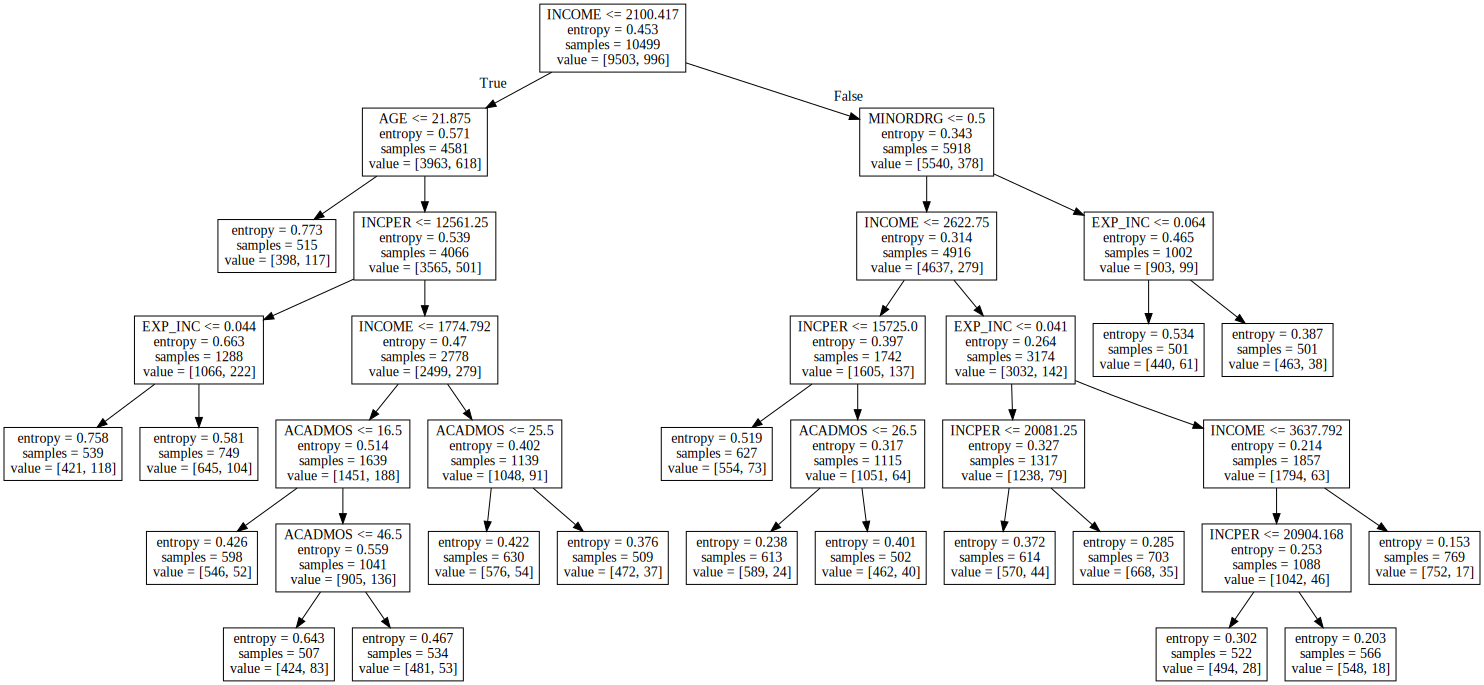

In [11]:
graph = Source( export_graphviz(tree, out_file=None, feature_names=X.columns))
graph

##### Save tree to file

In [12]:
graph.format = 'png'

#### View as image

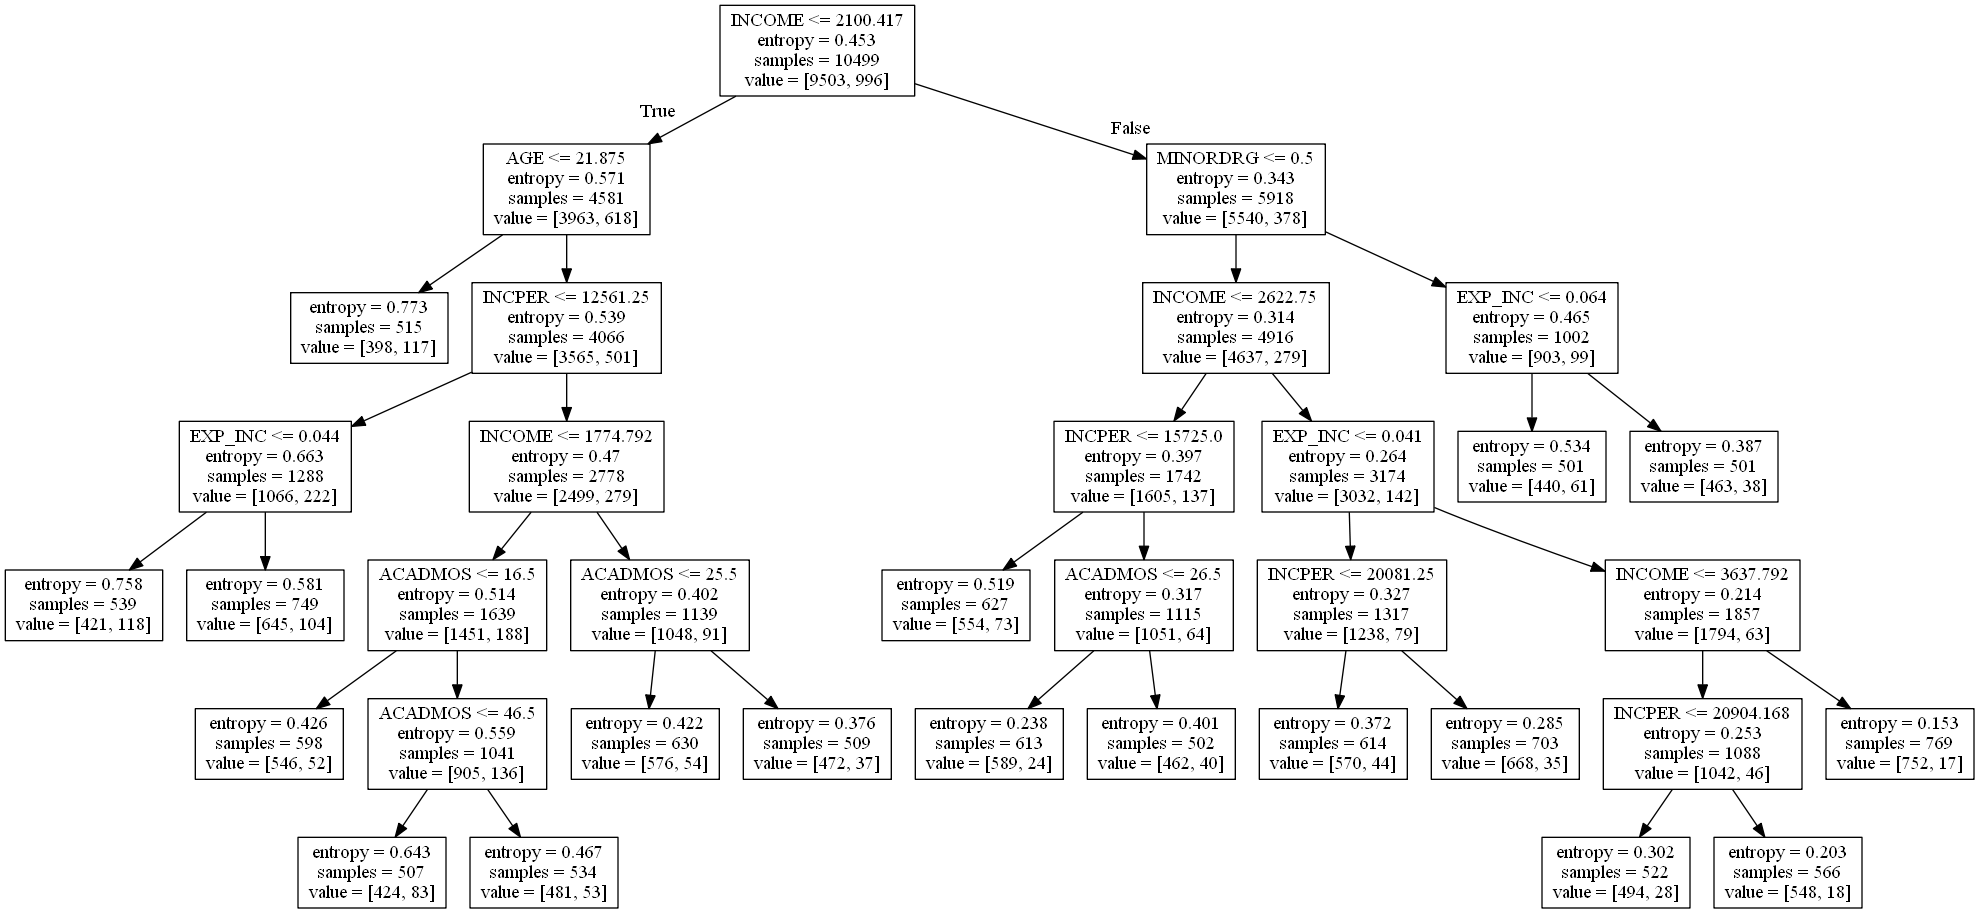

In [13]:
png_byte = graph.pipe(format='png')
Image(png_byte)

## Machine Learning w/ Validation

### Split into training/testing set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Build tree

In [15]:
tree = DecisionTreeClassifier(criterion='entropy')

### Train tree

In [16]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predict

In [17]:
y_pred = tree.predict(X_test)

### Evaluate model performance

In [18]:
acc = accuracy_score(y_test, y_pred)*100
print ('Model Accuracy: {}%'.format(round(acc,2)))

Model Accuracy: 83.09%


In [19]:
pd.DataFrame(
    confusion_matrix(y_test,y_pred),
    columns=['Predicted Not Default','Predicted Default'],
    index=['True Not Default','True Default']
)

Predicted Not Default  Predicted Default
True Not Default                   2145                222
True Default                        222                 36

### Visualize Tree
As you can see here, without setting the any tree parameters, like `min_leaf_samples`, the tree can grow to be quite large. 

In [20]:
graph = Source( export_graphviz(tree, out_file=None, feature_names=X.columns))
png_byte = graph.pipe(format='png')
Image(png_byte)